# 1. Data Processing

## 1.1 Data Preparation

In [1]:
# Import Packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from statistics import mode
from scipy.stats import norm,skew,stats
from scipy import stats
import matplotlib.pyplot as plt
from statlearning import plot_regressions
from statlearning import plot_histogram

In [2]:
# Plot settings

sns.set_context('notebook') 
sns.set_style('ticks') 
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette("pastel")
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
# Read in csv files and plot top of training data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Combining the train and test data to deal with the missing value

combined=pd.concat([test, train], axis=0)
train.head()
test.head()
combined.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  import sys


,Id,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,cleaning_fee,experiences_offered,extra_people,...,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit
0,0,4,2.0,Real Bed,2.0,2.0,moderate,84.0,none,15,...,10.0,10.0,10.0,10.0,10.0,100.0,10.0,0.69,Entire home/apt,85.0
1,1,5,2.0,Real Bed,2.0,3.0,strict_14_with_grace_period,NaN,none,0,...,2.0,8.0,8.0,10.0,10.0,60.0,8.0,0.13,Entire home/apt,NaN
2,2,6,2.0,Real Bed,3.0,4.0,moderate,NaN,none,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NaN
3,3,2,1.0,Real Bed,2.0,2.0,moderate,NaN,none,0,...,9.0,9.0,8.0,8.0,10.0,90.0,10.0,0.20,Entire home/apt,NaN
4,4,4,1.5,Real Bed,2.0,2.0,moderate,95.0,none,0,...,10.0,10.0,10.0,10.0,10.0,99.0,10.0,0.58,Entire home/apt,200.0


In [4]:
# check the types of data

train.dtypes

Id                                    int64
price                                 int64
experiences_offered                  object
host_response_time                   object
host_response_rate                  float64
host_is_superhost                    object
host_listings_count                   int64
host_identity_verified               object
latitude                            float64
longitude                           float64
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
bed_type                             object
security_deposit                    float64
cleaning_fee                        float64
guests_included                       int64
extra_people                          int64
minimum_nights                        int64
maximum_nights                  

In [5]:
# count missing data

train.isna().sum().sort_values(ascending=False)

security_deposit                    335
host_response_time                  302
host_response_rate                  302
review_scores_accuracy              265
review_scores_value                 265
review_scores_location              265
review_scores_cleanliness           265
review_scores_rating                264
review_scores_communication         264
review_scores_checkin               264
reviews_per_month                   249
cleaning_fee                        242
beds                                  1
bedrooms                              1
bathrooms                             1
instant_bookable                      0
longitude                             0
price                                 0
experiences_offered                   0
require_guest_profile_picture         0
cancellation_policy                   0
host_is_superhost                     0
host_listings_count                   0
host_identity_verified                0
latitude                              0


In [6]:
# Examine missingness of the testing data
combined.isna().sum().sort_values(ascending=False)

price                               1000
security_deposit                     642
host_response_rate                   617
host_response_time                   617
review_scores_value                  518
review_scores_location               517
review_scores_checkin                516
review_scores_accuracy               516
review_scores_cleanliness            516
review_scores_communication          516
review_scores_rating                 515
reviews_per_month                    479
cleaning_fee                         472
bathrooms                              6
beds                                   3
bedrooms                               2
host_is_superhost                      1
host_listings_count                    1
host_identity_verified                 1
extra_people                           0
experiences_offered                    0
cancellation_policy                    0
guests_included                        0
accommodates                           0
bed_type        

In [ ]:
combined = combined.drop(['Id'], axis=1)

## 1.2 Handling Missing Value

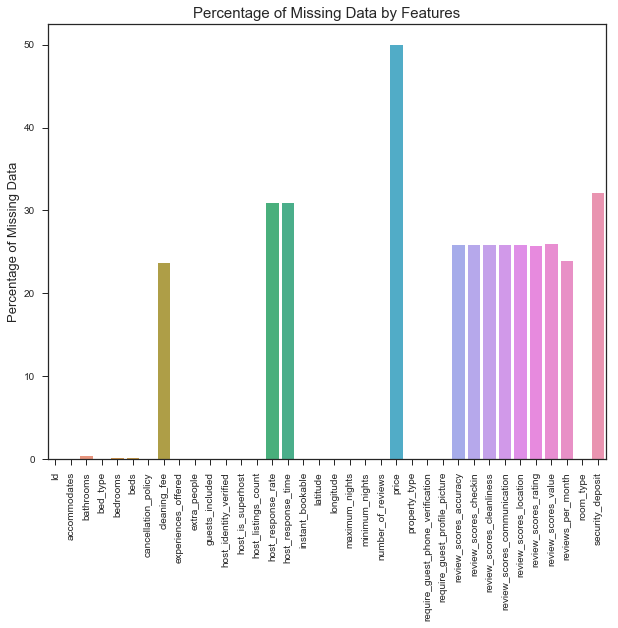

In [7]:
# plot percentage of missing data

missingdata_p_1 = (combined.isnull().sum() / len(combined)) * 100
plt.subplots(figsize = (10, 8))
sns.barplot(x = missingdata_p_1.index, y = missingdata_p_1)
plt.xticks(rotation = '90')
plt.ylabel('Percentage of Missing Data', fontsize = 13)
plt.title('Percentage of Missing Data by Features', fontsize = 15)
plt.show()

In [8]:
# drop ID from the dataframe "Variables" 
Variables=['experiences_offered','host_response_time','host_response_rate','host_is_superhost',
          'host_listings_count','host_identity_verified','latitude','longitude','property_type',
          'room_type','accommodates','bathrooms','bedrooms','beds','bed_type','security_deposit',
          'cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews',
          'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
          'review_scores_location','review_scores_value','instant_bookable','cancellation_policy',
          'require_guest_profile_picture','require_guest_phone_verification','reviews_per_month']

Text(0.5,1,'Top10 correlations among variables')

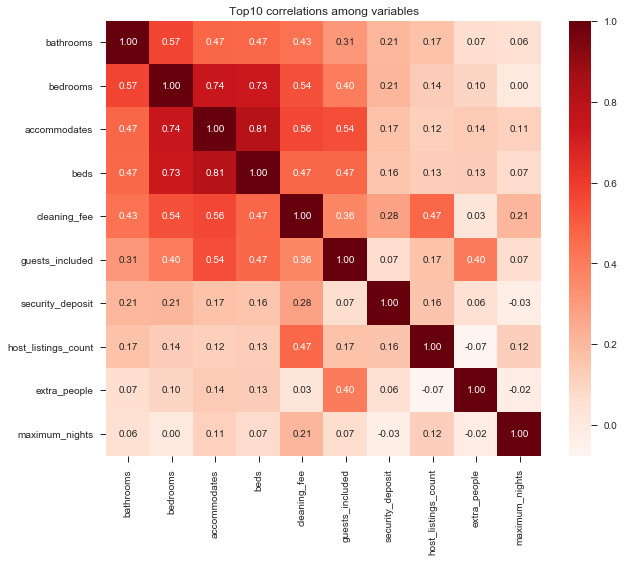

In [9]:
corrmant=train[Variables].corr()

Top10_Variables=corrmant['bathrooms'].nlargest(n=10).index
Top10=corrmant[Top10_Variables].loc[Top10_Variables]

plt.subplots(figsize=(10,8))
sns.heatmap(Top10,vmax=1,square=True,annot=True,fmt=".2f",cmap="Reds")
plt.title('Top10 correlations among variables')

In [10]:
# Show what variables are categorical
numeric_combined=combined.select_dtypes(include=[np.number])
categoric_combined=combined.select_dtypes(exclude=[np.number])
categoric_combined.columns

Index(['bed_type', 'cancellation_policy', 'experiences_offered',
       'host_identity_verified', 'host_is_superhost', 'host_response_time',
       'instant_bookable', 'property_type', 'require_guest_phone_verification',
       'require_guest_profile_picture', 'room_type'],
      dtype='object')

In [11]:
# Show what variables are numeric
numeric_combined.columns

Index(['Id', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
       'extra_people', 'guests_included', 'host_listings_count',
       'host_response_rate', 'latitude', 'longitude', 'maximum_nights',
       'minimum_nights', 'number_of_reviews', 'price',
       'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month', 'security_deposit'],
      dtype='object')

In [12]:
combined['beds'].fillna(np.mean(combined['beds']),inplace=True)

In [13]:
# check 'bedrooms'
combined.bedrooms.unique()

array([ 2.,  3.,  1.,  0.,  4.,  5.,  6., nan,  7.])

In [14]:
combined['bedrooms'].fillna(np.mean(combined['bedrooms']),inplace=True)

In [15]:
# calculate the mean of bedrooms
combined['bedrooms']
print(combined['bedrooms'].mean())

1.4034034034034035


In [16]:
# calculate the mean of accommodates
combined['accommodates']
print(combined['accommodates'].mean())

3.1975


In [17]:
# calculate the mean of beds
combined['beds']
print(combined['beds'].mean())

1.7085628442663996


In [18]:
# calculate the average of the above three variables'means 
a = 1.4026982698256136
b = 3.1975
c = 1.7085628442663996
d=(a+b+c)/3
round(d,3)

2.103

In [19]:
# check ‘bathrooms’
combined.bathrooms.unique()

array([ 2. ,  1. ,  1.5,  2.5,  3. ,  5. ,  nan,  0.5,  0. ,  3.5,  4.5,
       10. ,  4. ])

In [20]:
# use the average of the above three variables'means to fill NaN in bathrooms
combined.bathrooms.fillna(2.103,inplace=True)

In [21]:
# check ‘security_deposit’
combined.security_deposit.unique()

array([  85.,   nan,  200.,    0.,  250.,  550.,  400.,  100.,  180.,
        350.,  495.,   86., 1000.,  500.,  800., 3800.,  300.,  150.,
        700.,  750.,   80.,   63.,  120.,   75.,  450.,   72.,   96.,
        850.,  650., 3827.,  858.,  642.,   99., 3000.,   90.,  110.,
        480., 3500.,   74.,  899.,  430.,  220.,  900.,  210.,   77.,
         76.,  199.,  600.,  130.,  571., 2000.,  172.,   65.,   66.,
         79.,  195.,  557.,  301.,   78., 1300.,   81.,  330.,   84.,
        219., 3788.,   82.,  160.,  175., 1500.,   70.,   98.,  149.,
        152., 2500.])

In [22]:
# fill 0 to NaN for "security_deposit" 
combined.security_deposit.fillna(0,inplace=True)

In [23]:
# check 'cleaning_fee'
combined.cleaning_fee.unique()

array([ 84.,  nan,  95.,  64.,  50.,  30.,  60.,  40.,  28.,  80.,  15.,
        90.,  12.,  25.,  65., 225.,  20.,  51.,  35.,  55.,  18.,  85.,
        10.,   5.,  38.,   0.,  11.,  59.,   4., 300.,  45.,  75.,  21.,
       100., 150.,  86.,  70.,  19.,  22.,  48.,  32., 140.,  13.,  58.,
        99.,  29., 113.,  36.,  26., 130., 486., 104.,  49.,  39.,   9.,
        93.,   8.,  34.,   6., 135.,  98., 110., 129.,  71.,  69.,  43.,
        17., 120.,  33., 138., 145.,  14.,  68., 103., 195., 160., 125.,
       200.,  56., 375.,  92., 155.,  44.,  63.,  16.,  24., 132.,   7.,
        27.,  89.,  23.,  67., 108.,  61., 128.,  79., 105.,  94., 118.,
        37.])

In [24]:
# fill 0 to NaN for "cleaning_fee"
combined.cleaning_fee.fillna(0,inplace=True)

In [25]:
combined.host_response_time.unique()


array(['within an hour', 'within a few hours', nan, 'within a day',
       'a few days or more'], dtype=object)

In [26]:
# fill the mode to NaN for host_response_time
combined['host_response_time']
print(combined['host_response_time'].mode())

0    within an hour
dtype: object


In [27]:
combined.host_response_time.fillna('within an hour',inplace=True)
# fill the mean to NaN for host_response_rate
combined['host_response_rate'].fillna(np.mean(combined['host_response_rate']),inplace=True)
# Convert true/false to 1/0
# fill 0 to NaN for "host_is_superhost"
combined['host_is_superhost']=combined.host_is_superhost.map({"f":0,"t":1})
combined.host_is_superhost.fillna(0,inplace=True)

In [28]:
# fill the mean to NaN for host_listings_count
combined['host_listings_count'].fillna(np.mean(combined['host_listings_count']),inplace=True)
# Convert true/false to 1/0
# fill 0 to NaN for "host_identity_verified"
combined['host_identity_verified']=combined.host_identity_verified.map({"f":0,"t":1})
combined.host_identity_verified.fillna(0,inplace=True)
combined.reviews_per_month.fillna(0,inplace=True)

In [29]:
# Rescale the review_scores_rating
scaling_100='review_scores_rating'
combined['review_scores_rating'].fillna(np.mean(combined['review_scores_rating']),inplace=True)
combined[scaling_100]=combined['review_scores_rating']/10

In [30]:
combined['review_scores_accuracy'].fillna(np.mean(combined['review_scores_accuracy']),inplace=True)
combined['review_scores_cleanliness'].fillna(np.mean(combined['review_scores_cleanliness']),inplace=True)
combined['review_scores_communication'].fillna(np.mean(combined['review_scores_communication']),inplace=True)
combined['review_scores_location'].fillna(np.mean(combined['review_scores_location']),inplace=True)
combined['review_scores_value'].fillna(np.mean(combined['review_scores_value']),inplace=True)
combined['review_scores_checkin'].fillna(np.mean(combined['review_scores_checkin']),inplace=True)


In [31]:
# Recheck the whether there is any missing values
combined.isna().sum().sort_values(ascending=False)

price                               1000
security_deposit                       0
instant_bookable                       0
host_response_rate                     0
host_listings_count                    0
host_is_superhost                      0
host_identity_verified                 0
guests_included                        0
extra_people                           0
experiences_offered                    0
cleaning_fee                           0
cancellation_policy                    0
beds                                   0
bedrooms                               0
bed_type                               0
bathrooms                              0
accommodates                           0
host_response_time                     0
latitude                               0
room_type                              0
review_scores_checkin                  0
reviews_per_month                      0
review_scores_value                    0
review_scores_rating                   0
review_scores_lo

## 1.3 Split Training Data and Testing Data

In [32]:
Response = 'price'
Predictors = list(combined.drop(['price'],axis = 1))

test_new = combined[:1000]
train_new = combined[1000:]

# 2. Exploratory Data Analysis

## 2.1 Data Description and Visualisation for Price

In [33]:
# check the price column
train_new.price.describe()

count    1000.000000
mean      103.997000
std        70.387623
min        25.000000
25%        50.000000
50%        85.000000
75%       135.000000
max       400.000000
Name: price, dtype: float64

In [34]:
# check the skewness of price
train_new.price.skew()

1.6454669493901388

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Airbnb Price')

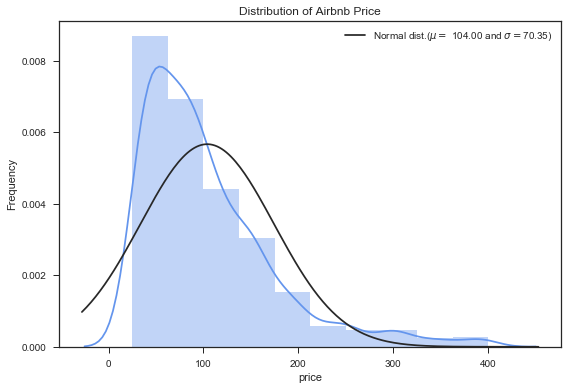

In [35]:
# Distribution of Airbnb Price
y= train_new['price']
sns.distplot(y,fit=norm, bins=10,color='cornflowerblue')
(mu,sigma)=norm.fit(y)
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Price')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Airbnb Price after log transformation')

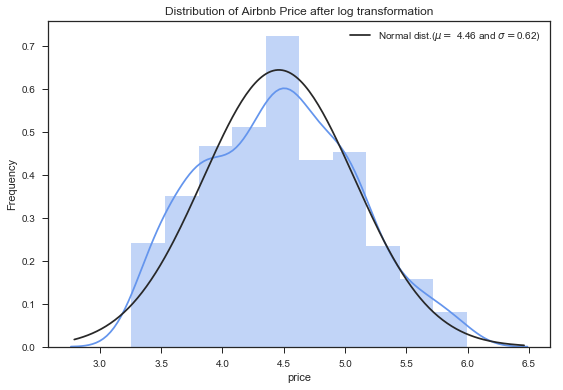

In [36]:
# Distribution after log transformation
y_log_train_new=np.log1p(y)
sns.distplot(y_log_train_new,fit=norm, bins=10,color='cornflowerblue')
(mu,sigma)=norm.fit(y_log_train_new)
plt.legend(['Normal dist.($\mu=$ {:.2f} and $\sigma=${:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Price after log transformation')

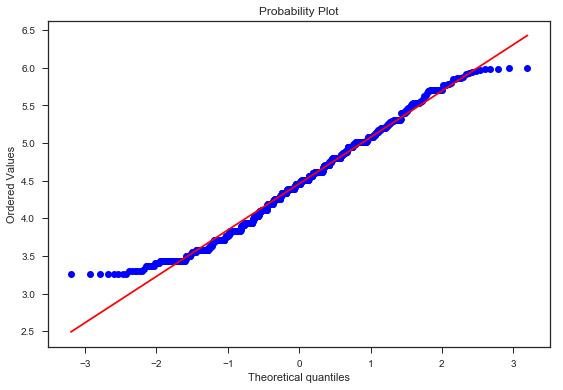

In [37]:
# probability plot
# probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.
res = stats.probplot(y_log_train_new,plot=plt)

In [38]:
total_corr = train_new.corr()
total_ab_corr = abs(total_corr)
print (total_ab_corr['price'].sort_values(ascending=False), '\n')

price                          1.000000
accommodates                   0.649212
beds                           0.531520
bedrooms                       0.529675
cleaning_fee                   0.520284
bathrooms                      0.472663
guests_included                0.352264
security_deposit               0.299492
host_listings_count            0.236387
longitude                      0.169498
maximum_nights                 0.161332
number_of_reviews              0.092377
extra_people                   0.083662
reviews_per_month              0.077618
review_scores_communication    0.065249
host_identity_verified         0.064429
review_scores_value            0.050687
host_response_rate             0.042345
Id                             0.040323
review_scores_rating           0.037278
review_scores_accuracy         0.033478
review_scores_checkin          0.032305
latitude                       0.027902
review_scores_location         0.017430
review_scores_cleanliness      0.013646


#### Plot relationships diagrams for correlation score above 0.45

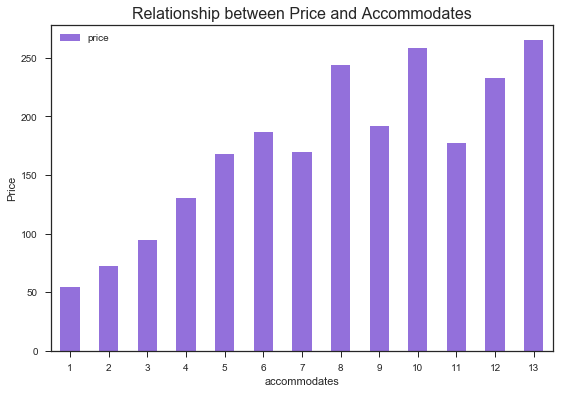

In [39]:
# check the relationship between mean price and accommodates

bedrooms_pivot = train_new.pivot_table(index='accommodates',
                                  values='price', aggfunc=np.mean)
bedrooms_pivot.plot(kind='bar', color='mediumpurple')
plt.xlabel('accommodates')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.title('Relationship between Price and Accommodates', fontsize = 16)
plt.show()

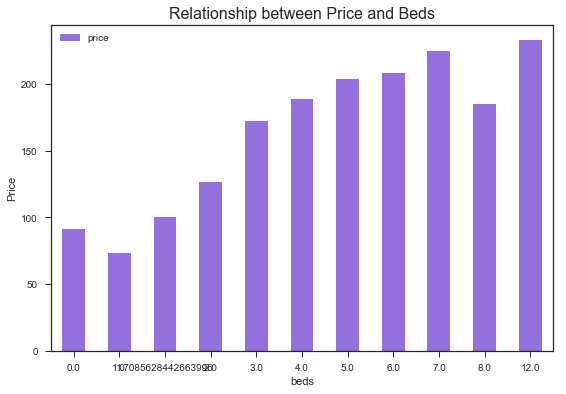

In [40]:
# check the relationship between mean price and beds

bedrooms_pivot = train_new.pivot_table(index='beds',
                                  values='price', aggfunc=np.mean)
bedrooms_pivot.plot(kind='bar', color='mediumpurple')
plt.xlabel('beds')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.title('Relationship between Price and Beds', fontsize = 16)
plt.show()

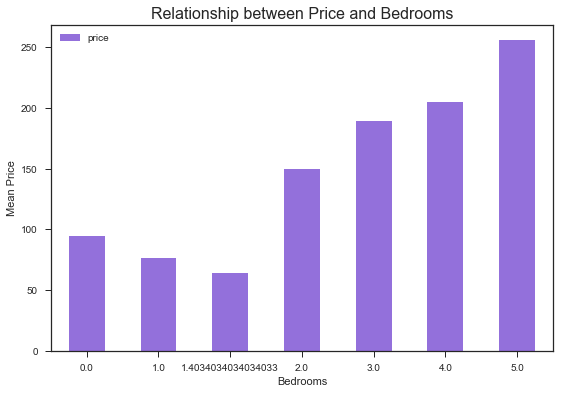

In [41]:
# check the relationship between mean price and bedrooms

bedrooms_pivot = train_new.pivot_table(index='bedrooms',
                                  values='price', aggfunc=np.mean)
bedrooms_pivot.plot(kind='bar', color='mediumpurple')
plt.xlabel('Bedrooms')
plt.ylabel('Mean Price')
plt.xticks(rotation=0)
plt.title('Relationship between Price and Bedrooms', fontsize = 16)
plt.show()

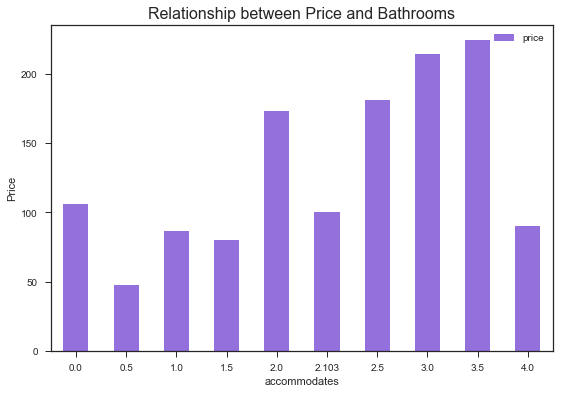

In [42]:
# check the relationship between mean price and bathrooms

bedrooms_pivot = train_new.pivot_table(index='bathrooms',
                                  values='price', aggfunc=np.mean)
bedrooms_pivot.plot(kind='bar', color='mediumpurple')
plt.xlabel('accommodates')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.title('Relationship between Price and Bathrooms', fontsize = 16)
plt.show()

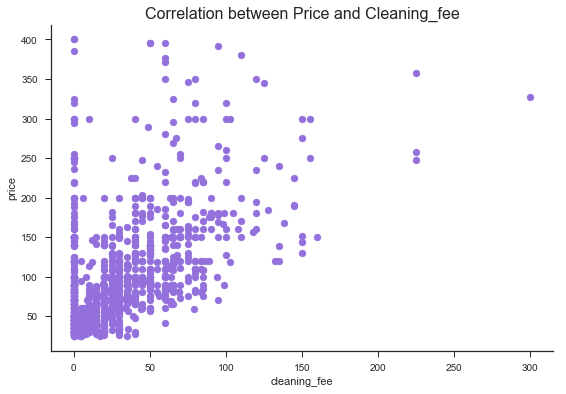

In [43]:
# check the correlation between price and cleaning_fee

plt.scatter(train_new['cleaning_fee'], train_new['price'], c = 'mediumpurple') 
plt.xlabel('cleaning_fee')
plt.ylabel('price')
sns.despine()
plt.title('Correlation between Price and Cleaning_fee', fontsize = 16)
plt.show()

## 2.2 Analysis of Correlation Between Numerical Variables

Text(0.5,1,'Correlation Among Variables')

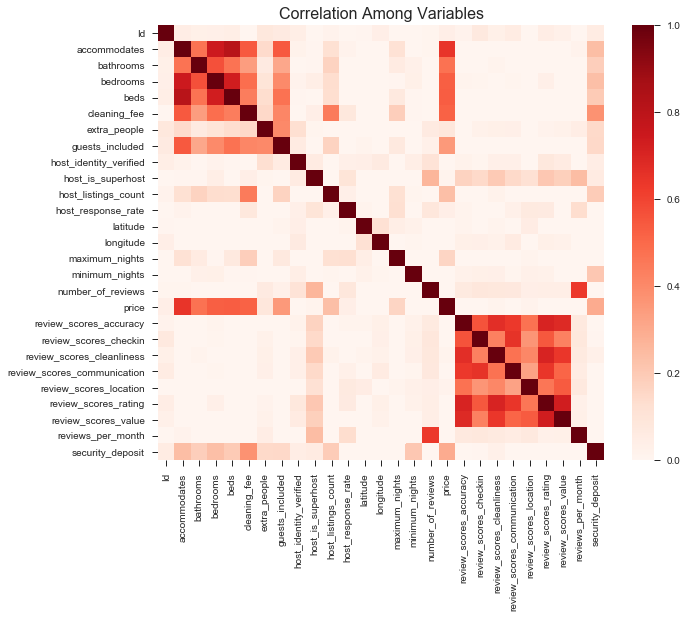

In [44]:
# check the correlation between each numeric feature
plt.figure(figsize = (10,8))
sns.heatmap(train_new.corr(), vmin = 0, vmax = 1, cmap = 'Reds')
plt.title('Correlation Among Variables', fontsize = 16)

###### From heatmap, there are two areas are highly correlated. It is important to check both areas

In [45]:
# create new dataframe for the first area

Room_Related = ['accommodates','bathrooms','bedrooms','beds']

df_Room = pd.DataFrame(train_new[Room_Related])
df_Room.head()

,accommodates,bathrooms,bedrooms,beds
0,4,4.0,1.0,4.0
1,4,2.0,2.0,2.0
2,2,1.0,0.0,0.0
3,3,1.0,0.0,2.0
4,5,2.0,3.0,3.0


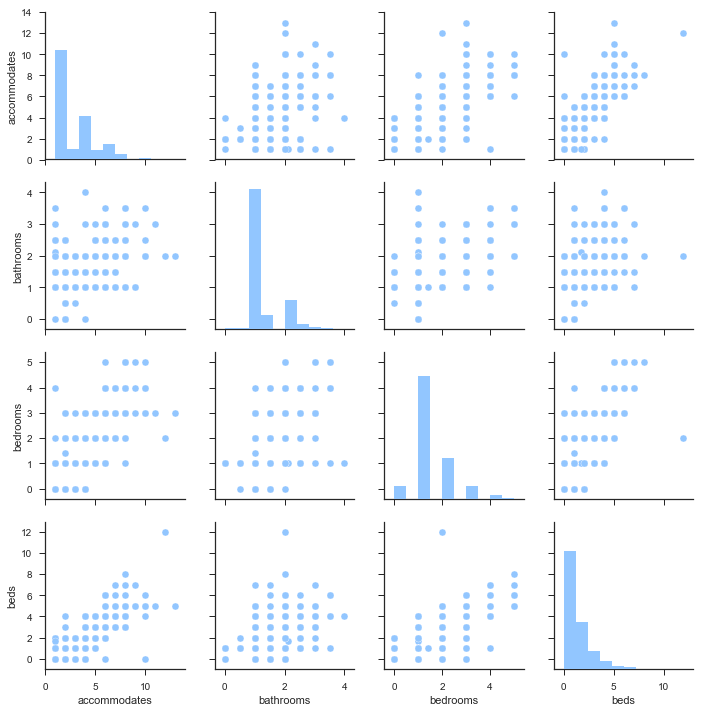

In [46]:
# plot correlation for the first area

sns.pairplot(df_Room)

In [47]:
# # it is clear that accommodates, bathrooms and bedrooms has strong correlation with each other
# So these could be combined into one feature in the feature engineering stage

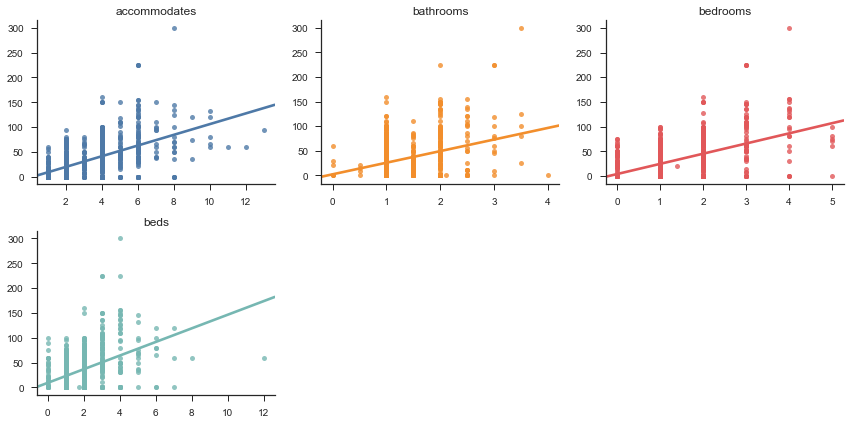

In [48]:
# check relationship between cleaning_fee and Room_Related Variables

with sns.color_palette(crayon):
    plot_regressions(train_new[Room_Related],train_new.cleaning_fee)
    plt.show()

In [49]:
# positive relationship between cleaning_fee and Room_Related Variables, especially bathrooms, bedrooms and beds

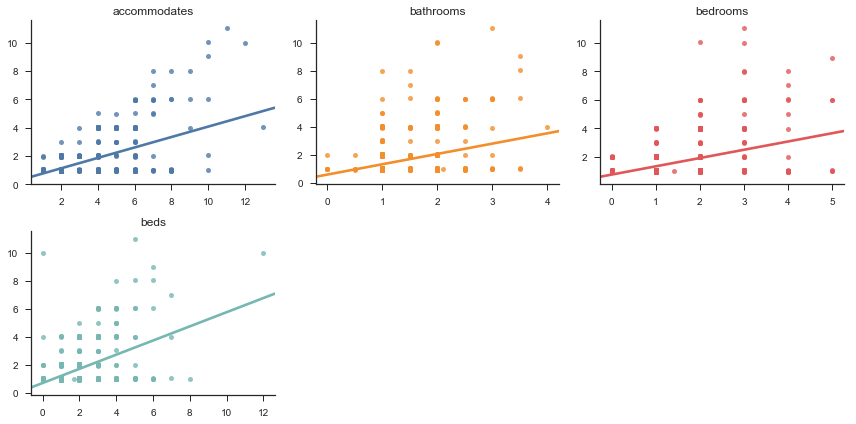

In [50]:
# check relationship between cleaning_fee and Room_Related Variables

with sns.color_palette(crayon):
    plot_regressions(train_new[Room_Related],train_new.guests_included)
    plt.show()

In [51]:
# slight positive relationship between guests_included and Room_Related Variables

In [52]:
# create new dataframe for the review_related variables

Review_ralated = ['review_scores_accuracy', 'review_scores_cleanliness','review_scores_rating',
       'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

df_Review = pd.DataFrame(train_new[Review_ralated])
df_Review.head()

,review_scores_accuracy,review_scores_cleanliness,review_scores_rating,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,9.000000,8.000000,8.000000,9.000000,9.000000,9.000000,10.000000
1,9.520216,9.282345,9.247273,9.625337,9.640162,9.538098,9.233468
2,10.000000,10.000000,9.700000,10.000000,10.000000,10.000000,10.000000
3,9.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000
4,9.520216,9.282345,9.247273,9.625337,9.640162,9.538098,9.233468


/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.patches.Patch object at 0x1c263dd048> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


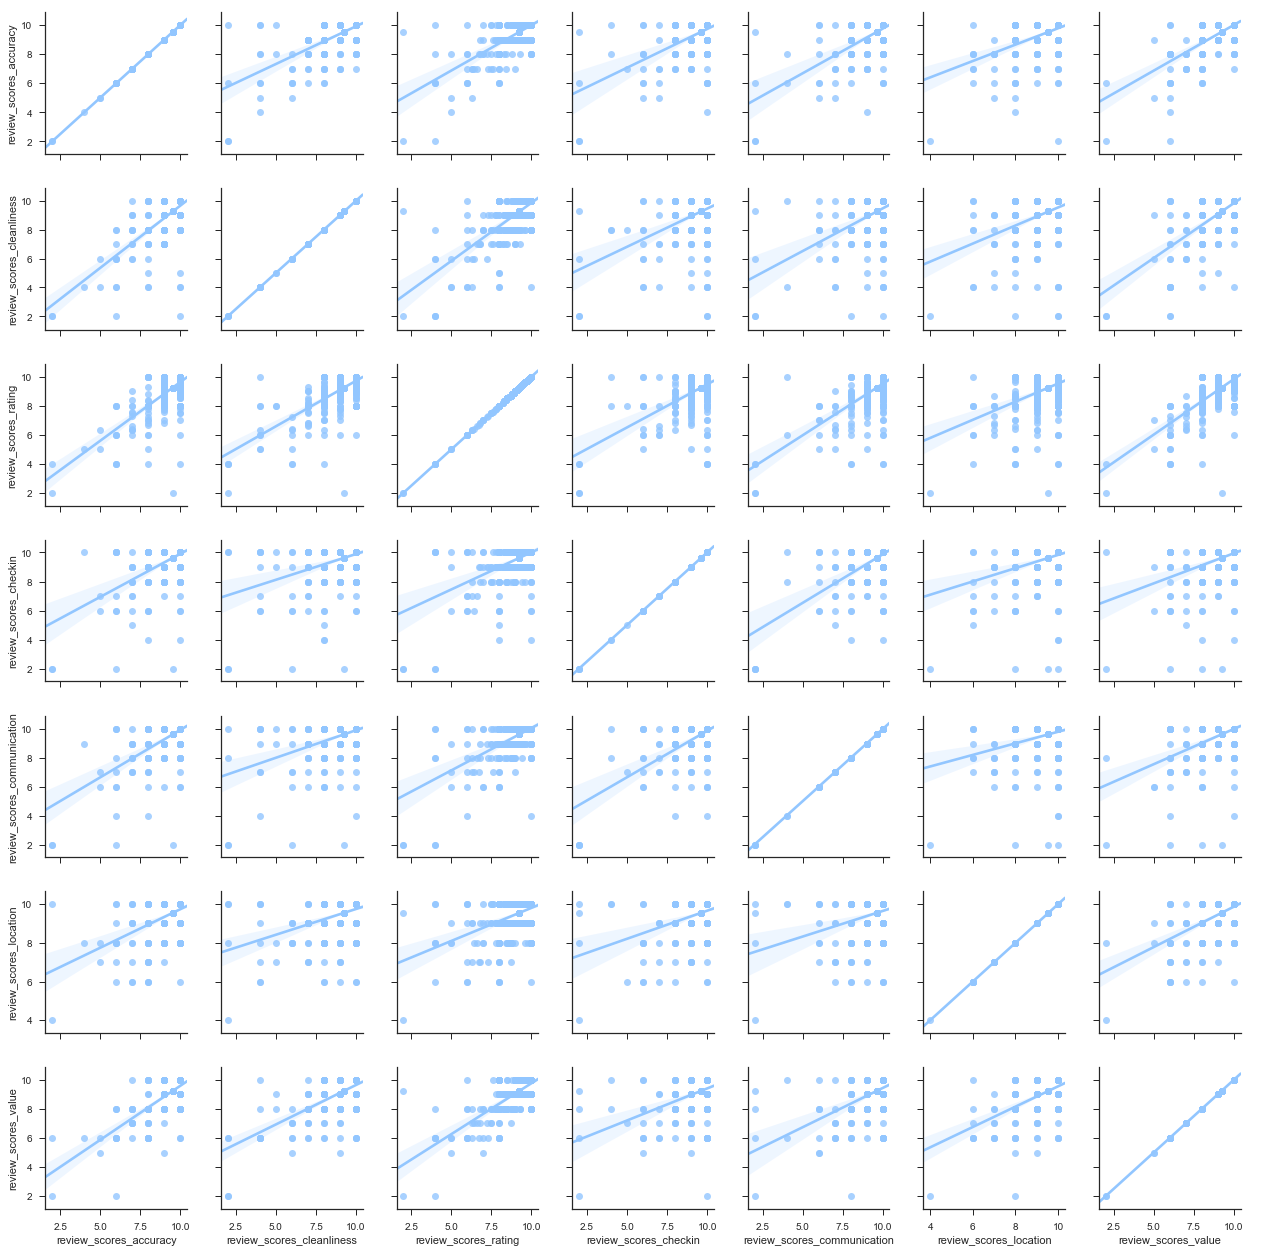

In [53]:
# plot correlation for the review_related variables
sns.set_palette("pastel")
Review_v = sns.PairGrid(df_Review)
Review_v.map(sns.regplot)
Review_v.add_legend();

Text(0.5,1,'Longitude and Latitude by Price')

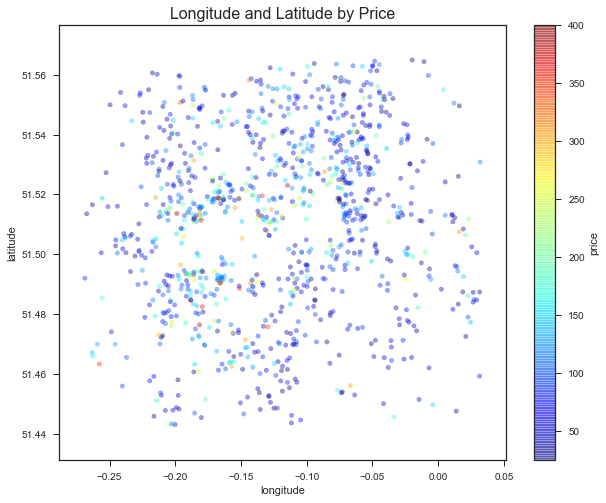

In [54]:
# check the relationship between price, longitude and latitude

train_new.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,8),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('Longitude and Latitude by Price', fontsize = 16)

## 2.3 Analysis of Correlation Between Categorial Variables 

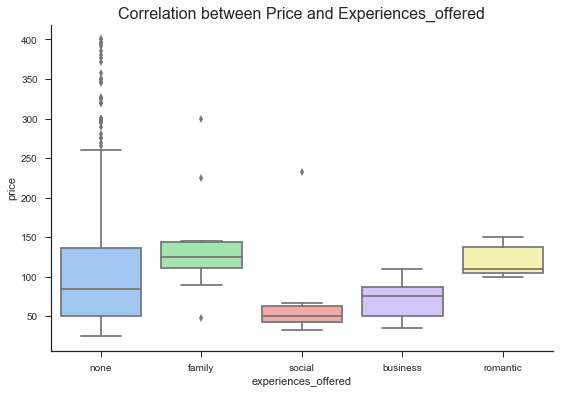

In [55]:
# Boxplot for Experiences Offered
sns.set_palette("pastel")
sns.boxplot(x = 'experiences_offered', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Experiences_offered', fontsize = 16)
plt.show()

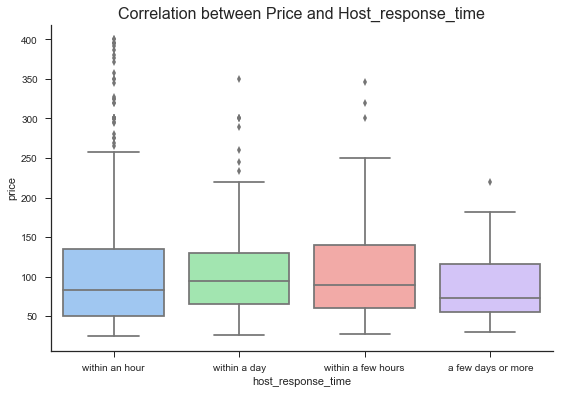

In [56]:
# Boxplot for Host_response_time
sns.set_palette("pastel")
sns.boxplot(x = 'host_response_time', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Host_response_time', fontsize = 16)
plt.show()

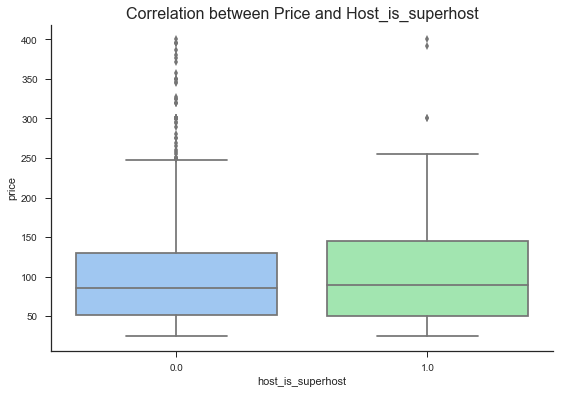

In [57]:
# check the correlation between price and host_is_superhost
sns.set_palette("pastel")
sns.boxplot(x = 'host_is_superhost', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Host_is_superhost', fontsize = 16)
plt.show()

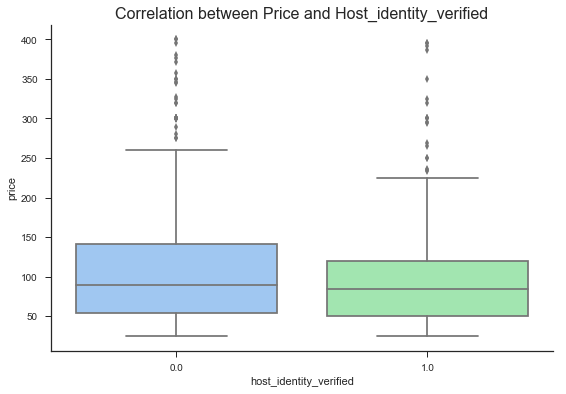

In [58]:
# check the correlation between price and host_identity_verified

sns.boxplot(x = 'host_identity_verified', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Host_identity_verified', fontsize = 16)
plt.show()

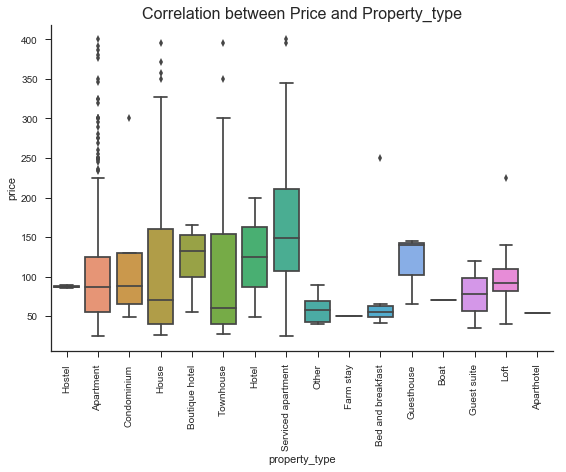

In [59]:
# check the correlation between price and property_type

sns.boxplot(x = 'property_type', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Property_type', fontsize = 16)
plt.xticks(rotation='vertical')
plt.show()

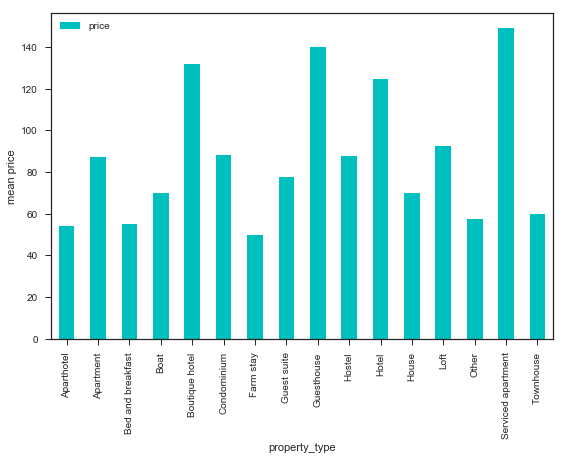

In [60]:
# Check the number of value classes for property_type
property_type_pivot = train_new.pivot_table(index='property_type',
                                    values='price', aggfunc=np.median)
property_type_pivot.plot(kind='bar', color='c')
plt.xlabel('property_type')
plt.ylabel('mean price')
plt.xticks(rotation=90)
plt.show()

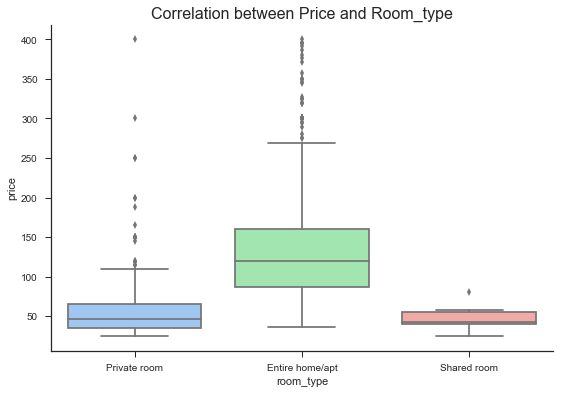

In [61]:
# check the correlation between price and room_type

sns.boxplot(x = 'room_type', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Room_type', fontsize = 16)
plt.show()

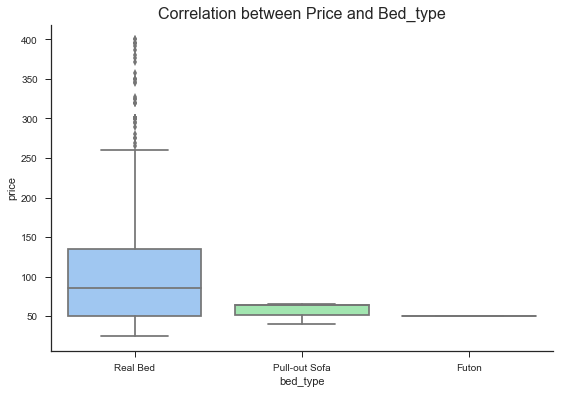

In [62]:
# check the correlation between price and bed_type

sns.boxplot(x = 'bed_type', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Bed_type', fontsize = 16)
plt.show()

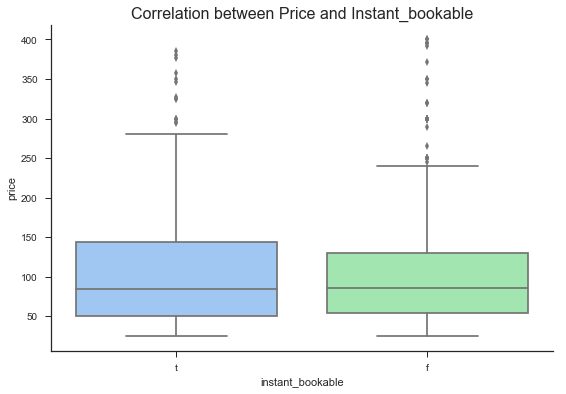

In [63]:
# check the correlation between price and instant_bookable

sns.boxplot(x = 'instant_bookable', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Instant_bookable', fontsize = 16)
plt.show()

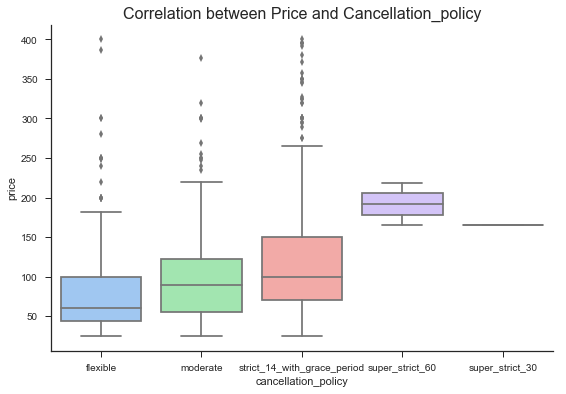

In [64]:
# check the correlation between price and cancellation_policy

sns.boxplot(x = 'cancellation_policy', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Cancellation_policy', fontsize = 16)
plt.show()

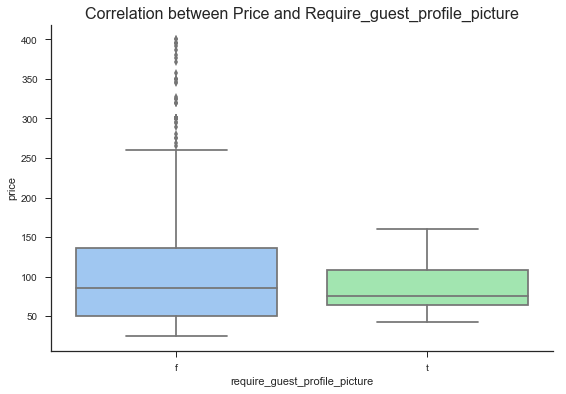

In [65]:
# check the correlation between price and require_guest_profile_picture
sns.boxplot(x = 'require_guest_profile_picture', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and Require_guest_profile_picture', fontsize = 16)
plt.show()

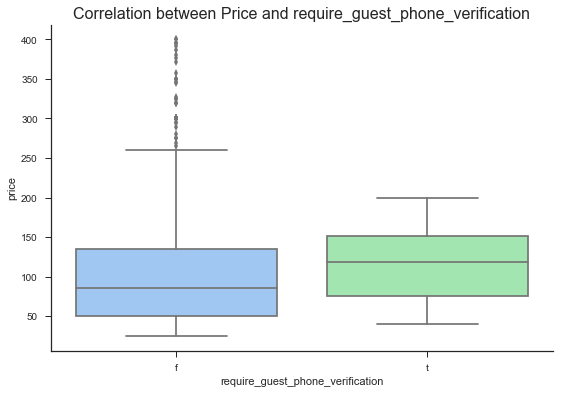

In [66]:
# check the correlation between price and require_guest_phone_verification
sns.boxplot(x = 'require_guest_phone_verification', y = 'price', data = train_new)
sns.despine()
plt.title('Correlation between Price and require_guest_phone_verification', fontsize = 16)
plt.show()

# 3. Feature Engineering

## 3.1 Categorical Variable Engineering

In [67]:
# check the categorical features in Data
category_variables = combined.select_dtypes(exclude=[np.number])
category_variables.describe()

,bed_type,cancellation_policy,experiences_offered,host_response_time,instant_bookable,property_type,require_guest_phone_verification,require_guest_profile_picture,room_type
count,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,5,5,5,4,2,19,2,2,3
top,Real Bed,strict_14_with_grace_period,none,within an hour,f,Apartment,f,f,Entire home/apt
freq,1984,876,1931,1498,1229,1506,1964,1982,1220


### 3.1.1 Reduce the Number of Value Classes in Categorical Variable

In [68]:
# count the values in 'property_type'

print(combined['property_type'].value_counts())
print(len(combined['property_type'].value_counts()))

Apartment             1506
House                  269
Townhouse               71
Serviced apartment      63
Condominium             24
Loft                    15
Bed and breakfast       13
Other                    9
Guesthouse               5
Boutique hotel           5
Guest suite              5
Hostel                   4
Boat                     3
Cottage                  2
Hotel                    2
Treehouse                1
Aparthotel               1
Farm stay                1
Villa                    1
Name: property_type, dtype: int64
19


In [69]:
# classify values

combined['property_type'] = combined['property_type'].replace('Condominium', 'Other')
combined['property_type'] = combined['property_type'].replace('Loft', 'Other')
combined['property_type'] = combined['property_type'].replace('Bed and breakfast', 'Other')
combined['property_type'] = combined['property_type'].replace('Boutique hotel', 'Other')
combined['property_type'] = combined['property_type'].replace('Guesthouse', 'Other')
combined['property_type'] = combined['property_type'].replace('Hotel', 'Other')
combined['property_type'] = combined['property_type'].replace('Guest suite', 'Other')
combined['property_type'] = combined['property_type'].replace('Hostel', 'Other')
combined['property_type'] = combined['property_type'].replace('Farm stay', 'Other')
combined['property_type'] = combined['property_type'].replace('Boat', 'Other')
combined['property_type'] = combined['property_type'].replace('Aparthotel', 'Other')
combined['property_type'] = combined['property_type'].replace('Townhouse', 'House')
combined['property_type'] = combined['property_type'].replace('Treehouse', 'House')
combined['property_type'] = combined['property_type'].replace('Cottage', 'Other')
combined['property_type'] = combined['property_type'].replace('Villa', 'Other')


In [70]:
# count the values in 'property_type'
print(combined['property_type'].value_counts())
print(len(combined['property_type'].value_counts()))

Apartment             1506
House                  341
Other                   90
Serviced apartment      63
Name: property_type, dtype: int64
4


### 3.1.2 Get Dummy

In [71]:
combined.host_is_superhost.value_counts()

0.0    1743
1.0     257
Name: host_is_superhost, dtype: int64

In [72]:
combined.host_identity_verified.value_counts()

0.0    1228
1.0     772
Name: host_identity_verified, dtype: int64

In [73]:
combined['instant_bookable']=combined.instant_bookable.map({"f":0,"t":1})

In [74]:
# instant_bookable

combined.instant_bookable.value_counts()

0    1229
1     771
Name: instant_bookable, dtype: int64

In [75]:
combined['require_guest_profile_picture']=combined.require_guest_profile_picture.map({"f":0,"t":1})

In [76]:
# require_guest_profile_picture
combined.instant_bookable.value_counts()

0    1229
1     771
Name: instant_bookable, dtype: int64

In [77]:
combined['require_guest_phone_verification']=combined.require_guest_phone_verification.map({"f":0,"t":1})

In [78]:
# require_guest_phone_verification
combined.instant_bookable.value_counts()

0    1229
1     771
Name: instant_bookable, dtype: int64

In [79]:
# experiences_offered
combined.experiences_offered.value_counts()

none        1931
family        25
social        19
business      15
romantic      10
Name: experiences_offered, dtype: int64

In [80]:
dummy_experiences_offered = pd.get_dummies(combined['experiences_offered'])
combined = pd.concat([combined, dummy_experiences_offered], axis=1)

In [81]:
# host_response_time
combined.host_response_time.value_counts()

within an hour        1498
within a few hours     260
within a day           196
a few days or more      46
Name: host_response_time, dtype: int64

In [82]:
dummy_host_response_time = pd.get_dummies(combined['host_response_time'])
combined = pd.concat([combined, dummy_host_response_time], axis=1)

In [83]:
# bed_type
combined.bed_type.value_counts()

Real Bed         1984
Pull-out Sofa      10
Futon               3
Couch               2
Airbed              1
Name: bed_type, dtype: int64

In [84]:
dummy_bed_type = pd.get_dummies(combined['bed_type'])
combined = pd.concat([combined, dummy_bed_type], axis=1)

In [85]:
# cancellation_policy
combined.cancellation_policy.value_counts()

strict_14_with_grace_period    876
flexible                       610
moderate                       499
super_strict_30                 11
super_strict_60                  4
Name: cancellation_policy, dtype: int64

In [86]:
dummy_cancellation_policy= pd.get_dummies(combined['cancellation_policy'])
combined = pd.concat([combined, dummy_cancellation_policy], axis=1)

In [87]:
# property_type
dummy_property_type = pd.get_dummies(combined['property_type'])
combined = pd.concat([combined, dummy_property_type], axis=1)

In [88]:
# room_type
combined.room_type.value_counts()

Entire home/apt    1220
Private room        768
Shared room          12
Name: room_type, dtype: int64

In [89]:
dummy_room_type = pd.get_dummies(combined['room_type'])
combined = pd.concat([combined, dummy_room_type], axis=1)

In [90]:
# review_scores_value
combined.review_scores_value.value_counts()

10.000000    695
9.000000     568
9.233468     518
8.000000     152
6.000000      32
7.000000      25
5.000000       5
2.000000       3
4.000000       2
Name: review_scores_value, dtype: int64

In [91]:
combined.head()

,Id,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,cleaning_fee,experiences_offered,extra_people,...,strict_14_with_grace_period,super_strict_30,super_strict_60,Apartment,House,Other,Serviced apartment,Entire home/apt,Private room,Shared room
0,0,4,2.0,Real Bed,2.0,2.0,moderate,84.0,none,15,...,0,0,0,1,0,0,0,1,0,0
1,1,5,2.0,Real Bed,2.0,3.0,strict_14_with_grace_period,0.0,none,0,...,1,0,0,1,0,0,0,1,0,0
2,2,6,2.0,Real Bed,3.0,4.0,moderate,0.0,none,10,...,0,0,0,1,0,0,0,1,0,0
3,3,2,1.0,Real Bed,2.0,2.0,moderate,0.0,none,0,...,0,0,0,1,0,0,0,1,0,0
4,4,4,1.5,Real Bed,2.0,2.0,moderate,95.0,none,0,...,0,0,0,1,0,0,0,1,0,0


## 3.2 Analysis of Correlation Between Numerical Variables

### 3.2.1 Columns  restructure

In [93]:
# Rescale the four room_related variables
Room = combined["accommodates"]/13+combined["bathrooms"]/4+combined["bedrooms"]/5+combined["beds"]/12
# Create another data column by
combined['room'] = Room
Room.head()

0    1.374359
1    1.534615
2    1.894872
3    0.970513
4    1.249359
dtype: float64

In [94]:
# Use variable "Room" and drop 'accommodates','bathrooms','bedrooms','beds'
combined =combined.drop(['accommodates','bathrooms','bedrooms','beds'],axis=1)
combined.head()

,bed_type,cancellation_policy,cleaning_fee,experiences_offered,extra_people,guests_included,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,...,super_strict_30,super_strict_60,Apartment,House,Other,Serviced apartment,Entire home/apt,Private room,Shared room,room
0,Real Bed,moderate,84.0,none,15,2,0.0,0.0,1.0,1.00,...,0,0,1,0,0,0,1,0,0,1.374359
1,Real Bed,strict_14_with_grace_period,0.0,none,0,1,1.0,0.0,62.0,0.94,...,0,0,1,0,0,0,1,0,0,1.534615
2,Real Bed,moderate,0.0,none,10,6,0.0,0.0,5.0,1.00,...,0,0,1,0,0,0,1,0,0,1.894872
3,Real Bed,moderate,0.0,none,0,1,0.0,0.0,1.0,0.90,...,0,0,1,0,0,0,1,0,0,0.970513
4,Real Bed,moderate,95.0,none,0,1,0.0,1.0,150.0,1.00,...,0,0,1,0,0,0,1,0,0,1.249359


In [95]:
# Rescale the seven room_related variables
review_scores=(combined['review_scores_rating']+ combined['review_scores_accuracy']+combined['review_scores_cleanliness']+combined['review_scores_checkin']+combined['review_scores_communication']+combined['review_scores_location']+combined['review_scores_value'])/7
# Create another data column by
combined['review_score'] = review_scores
review_scores.head()                           
                           
                           

0    10.000000
1     7.428571
2     9.440986
3     9.000000
4     9.985714
dtype: float64

In [96]:
# Use variable "review_scores" and drop 'review_scores_rating','review_scores_accuracy',
#'review_scores_cleanliness','review_scores_checkin','review_scores_communication', 
#'review_scores_location','review_scores_value'
combined = combined.drop(['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value'],axis=1)
combined.head()

,bed_type,cancellation_policy,cleaning_fee,experiences_offered,extra_people,guests_included,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,...,super_strict_60,Apartment,House,Other,Serviced apartment,Entire home/apt,Private room,Shared room,room,review_score
0,Real Bed,moderate,84.0,none,15,2,0.0,0.0,1.0,1.00,...,0,1,0,0,0,1,0,0,1.374359,10.000000
1,Real Bed,strict_14_with_grace_period,0.0,none,0,1,1.0,0.0,62.0,0.94,...,0,1,0,0,0,1,0,0,1.534615,7.428571
2,Real Bed,moderate,0.0,none,10,6,0.0,0.0,5.0,1.00,...,0,1,0,0,0,1,0,0,1.894872,9.440986
3,Real Bed,moderate,0.0,none,0,1,0.0,0.0,1.0,0.90,...,0,1,0,0,0,1,0,0,0.970513,9.000000
4,Real Bed,moderate,95.0,none,0,1,0.0,1.0,150.0,1.00,...,0,1,0,0,0,1,0,0,1.249359,9.985714


### 3.2.2 Change latitude and longtitude to a new vairable "Distance"

In [97]:
# choose Hyde Park as the centre point 
latitude_park = 51.5073
longitude_park = 0.1657

In [98]:
# create a new feature: Distance
combined['Distance'] = np.sqrt((latitude_park - combined['latitude'])**2 + (longitude_park - combined['longitude'])**2)
combined.head()

,bed_type,cancellation_policy,cleaning_fee,experiences_offered,extra_people,guests_included,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,...,Apartment,House,Other,Serviced apartment,Entire home/apt,Private room,Shared room,room,review_score,Distance
0,Real Bed,moderate,84.0,none,15,2,0.0,0.0,1.0,1.00,...,1,0,0,0,1,0,0,1.374359,10.000000,0.337880
1,Real Bed,strict_14_with_grace_period,0.0,none,0,1,1.0,0.0,62.0,0.94,...,1,0,0,0,1,0,0,1.534615,7.428571,0.312394
2,Real Bed,moderate,0.0,none,10,6,0.0,0.0,5.0,1.00,...,1,0,0,0,1,0,0,1.894872,9.440986,0.346207
3,Real Bed,moderate,0.0,none,0,1,0.0,0.0,1.0,0.90,...,1,0,0,0,1,0,0,0.970513,9.000000,0.234535
4,Real Bed,moderate,95.0,none,0,1,0.0,1.0,150.0,1.00,...,1,0,0,0,1,0,0,1.249359,9.985714,0.361219


In [99]:
# drop overlapped columns

combined_1 = combined.drop(['experiences_offered','host_response_time','bed_type','room_type','cancellation_policy','property_type','longitude','latitude'],axis=1)
combined_1.head()

,cleaning_fee,extra_people,guests_included,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,instant_bookable,maximum_nights,minimum_nights,...,Apartment,House,Other,Serviced apartment,Entire home/apt,Private room,Shared room,room,review_score,Distance
0,84.0,15,2,0.0,0.0,1.0,1.00,0,21,2,...,1,0,0,0,1,0,0,1.374359,10.000000,0.337880
1,0.0,0,1,1.0,0.0,62.0,0.94,0,1125,6,...,1,0,0,0,1,0,0,1.534615,7.428571,0.312394
2,0.0,10,6,0.0,0.0,5.0,1.00,1,1125,1,...,1,0,0,0,1,0,0,1.894872,9.440986,0.346207
3,0.0,0,1,0.0,0.0,1.0,0.90,0,1125,7,...,1,0,0,0,1,0,0,0.970513,9.000000,0.234535
4,95.0,0,1,0.0,1.0,150.0,1.00,0,1125,3,...,1,0,0,0,1,0,0,1.249359,9.985714,0.361219


## 3.3 Log Transforamtion

In [100]:
# check the skewness of variables
combined_1.skew().sort_values(ascending=False)

Airbed                              44.721360
Couch                               31.599027
Futon                               25.781098
super_strict_60                     22.310278
romantic                            14.046385
Pull-out Sofa                       14.046385
super_strict_30                     13.382537
Shared room                         12.803068
business                            11.425264
require_guest_profile_picture       10.405892
social                              10.120591
minimum_nights                       9.461575
family                               8.782274
require_guest_phone_verification     7.256228
host_listings_count                  6.947538
security_deposit                     6.539015
a few days or more                   6.368880
Serviced apartment                   5.368592
number_of_reviews                    4.835134
Other                                4.392981
guests_included                      3.028057
cleaning_fee                      

In [101]:
# Do the log transformation for skewness above 0，excluding the value of variables (0/1)
combined_1[['price','room','cleaning_fee','number_of_reviews','reviews_per_month',
            'extra_people','guests_included','security_deposit','host_listings_count','minimum_nights']]=np.log1p(combined_1[['price','room','cleaning_fee','number_of_reviews','reviews_per_month',
            'extra_people','guests_included','security_deposit','host_listings_count','minimum_nights']])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


In [102]:
# Recheck the skewness of variables
combined_1.skew().sort_values(ascending=False)

Airbed                              44.721360
Couch                               31.599027
Futon                               25.781098
super_strict_60                     22.310278
romantic                            14.046385
Pull-out Sofa                       14.046385
super_strict_30                     13.382537
Shared room                         12.803068
business                            11.425264
require_guest_profile_picture       10.405892
social                              10.120591
family                               8.782274
require_guest_phone_verification     7.256228
a few days or more                   6.368880
Serviced apartment                   5.368592
Other                                4.392981
within a day                         2.706236
minimum_nights                       2.316393
host_is_superhost                    2.221925
within a few hours                   2.202046
host_listings_count                  2.104919
guests_included                   

## 3.4 Re-check Correlations

Text(0.5,1,'Correlation Between Variables')

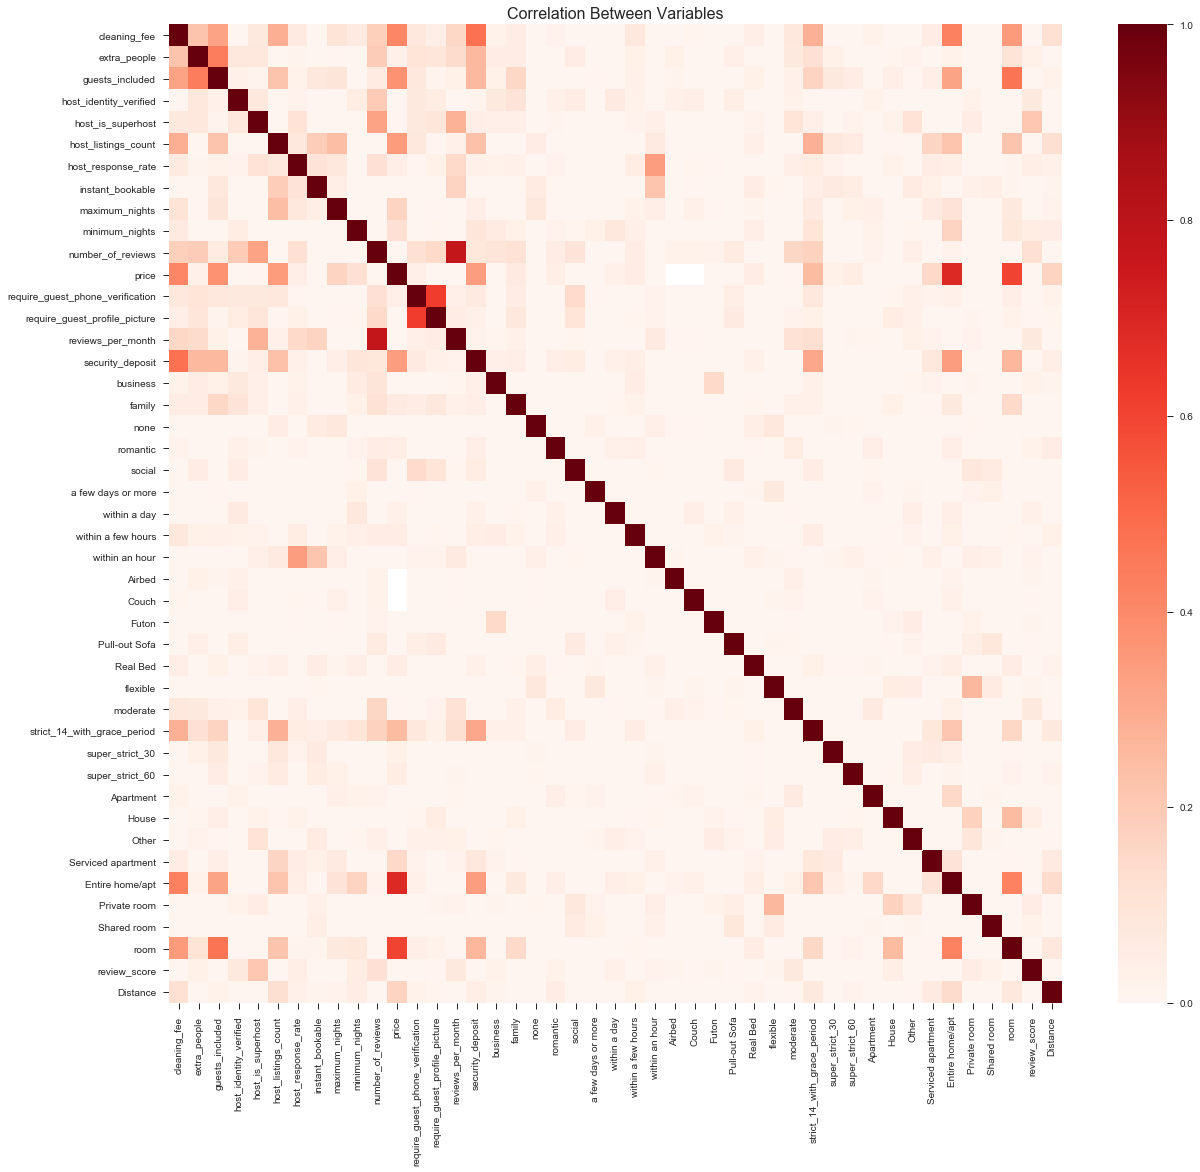

In [103]:
# use heatmap to recheck the correlation
plt.figure(figsize = (20,18))
sns.heatmap(combined_1.corr(), vmin = 0, vmax = 1,  cmap = 'Reds')
plt.title('Correlation Between Variables', fontsize = 16)

In [104]:
total_corr_2 = combined_1.corr()
total_ab_corr_2 = abs(total_corr_2)
print (total_ab_corr_2['price'].sort_values(ascending=False), '\n')

price                               1.000000
Entire home/apt                     0.687678
Private room                        0.677017
room                                0.602111
cleaning_fee                        0.412660
guests_included                     0.378140
host_listings_count                 0.344730
security_deposit                    0.340078
flexible                            0.271928
strict_14_with_grace_period         0.246211
maximum_nights                      0.168406
Distance                            0.166633
Serviced apartment                  0.150648
minimum_nights                      0.117842
number_of_reviews                   0.082309
Shared room                         0.079039
family                              0.065077
social                              0.064647
host_identity_verified              0.057612
super_strict_60                     0.057382
reviews_per_month                   0.051138
within a few hours                  0.049531
within an 

## 3.5 Drop Less Related Columns

In [105]:
# Drop variables with correlation score less than 0.05
combined_2= combined_1.drop(['Airbed','Couch','none','host_is_superhost','moderate','instant_bookable',
                  'require_guest_profile_picture','Apartment','Other','a few days or more','extra_people','Futon','within a day',
                 'super_strict_30','review_score','business','Pull-out Sofa','require_guest_phone_verification','host_response_rate',
                 'House','romantic','Real Bed','within an hour'],axis=1)
combined_2.head()


,cleaning_fee,guests_included,host_identity_verified,host_listings_count,maximum_nights,minimum_nights,number_of_reviews,price,reviews_per_month,security_deposit,...,within a few hours,flexible,strict_14_with_grace_period,super_strict_60,Serviced apartment,Entire home/apt,Private room,Shared room,room,Distance
0,4.442651,1.098612,0.0,0.693147,21,1.098612,2.564949,NaN,0.524729,4.454347,...,0,0,0,0,0,1,0,0,0.864727,0.337880
1,0.000000,0.693147,1.0,4.143135,1125,1.945910,0.693147,NaN,0.122218,0.000000,...,1,0,1,0,0,1,0,0,0.930042,0.312394
2,0.000000,1.945910,0.0,1.791759,1125,0.693147,0.000000,NaN,0.000000,0.000000,...,0,0,0,0,0,1,0,0,1.062941,0.346207
3,0.000000,0.693147,0.0,0.693147,1125,2.079442,1.098612,NaN,0.182322,0.000000,...,1,0,0,0,0,1,0,0,0.678294,0.234535
4,4.564348,0.693147,0.0,5.017280,1125,1.386294,2.833213,NaN,0.457425,5.303305,...,0,0,0,0,0,1,0,0,0.810645,0.361219


In [106]:
combined_2.isna().sum().sort_values(ascending=False)

price                          1000
Distance                          0
room                              0
guests_included                   0
host_identity_verified            0
host_listings_count               0
maximum_nights                    0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
security_deposit                  0
family                            0
social                            0
within a few hours                0
flexible                          0
strict_14_with_grace_period       0
super_strict_60                   0
Serviced apartment                0
Entire home/apt                   0
Private room                      0
Shared room                       0
cleaning_fee                      0
dtype: int64

## 3.6 Split Training Data and Testing Data


In [107]:
Response = 'price'
Predictors = list(combined_2.drop(['price'],axis = 1))

test_new_1 = combined_2[:1000]
train_new_1 = combined_2[1000:]

In [108]:
list(train_new_1.columns.values)

['cleaning_fee',
 'guests_included',
 'host_identity_verified',
 'host_listings_count',
 'maximum_nights',
 'minimum_nights',
 'number_of_reviews',
 'price',
 'reviews_per_month',
 'security_deposit',
 'family',
 'social',
 'within a few hours',
 'flexible',
 'strict_14_with_grace_period',
 'super_strict_60',
 'Serviced apartment',
 'Entire home/apt',
 'Private room',
 'Shared room',
 'room',
 'Distance']

## 3.7 Check Outliers

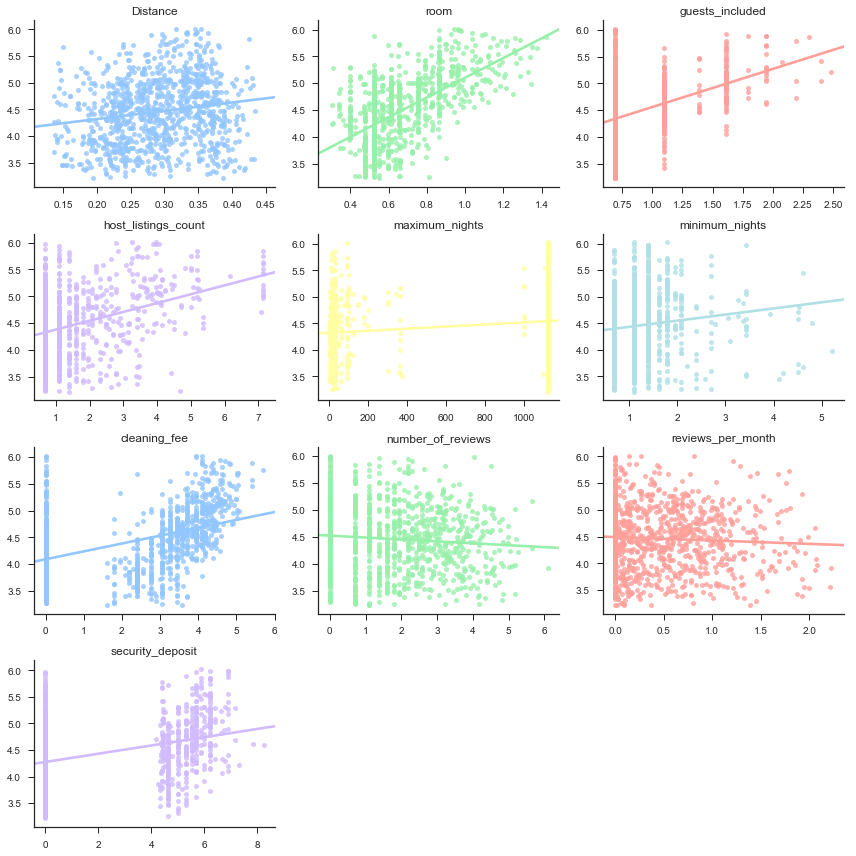

In [109]:
# plot relationship for variables that values are not 0/1 in train_new_1 dataframe.

Numerical_train_new1 = ['Distance','room','guests_included','host_listings_count','maximum_nights','minimum_nights','cleaning_fee',
        'number_of_reviews','reviews_per_month','security_deposit']

plot_regressions(train_new_1[Numerical_train_new1], y=train_new_1['price'])
plt.show()

In [110]:
# There are no obvious outliers

In [111]:
train_new_1.shape

(1000, 22)

In [112]:
test_new_1.shape

(1000, 22)

In [113]:
Response = 'price'
Predictors = list(train_new_1.drop(['price'],axis = 1))

y_test = test_new_1[Response]
y_train = train_new_1[Response]
x_test = test_new_1[Predictors]
x_train = train_new_1[Predictors]



# Interpertation Model

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
#import xgboost as xgb
#import lightgbm as lgb
#from mlxtend.regressor import StackingCVRegressor

In [115]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x_train)
x_scaler_test = scaler.fit_transform(x_test)

## OLS

In [116]:
ols = LinearRegression(fit_intercept = True)
reg = ols.fit(x_scaler, y_train)
print(reg.coef_)
print(reg.intercept_)

[ 0.00595999  0.01443146 -0.01372406  0.05750384  0.0317671  -0.01515313
 -0.06172602  0.01321022  0.02032106  0.00151254  0.00839943  0.00459963
 -0.00247398  0.01700563  0.02364734  0.02232897  0.15194874 -0.14770842
 -0.02936735  0.21593697  0.03498202]
4.460110270735019


In [117]:
y_pred_ols = reg.predict(x_scaler_test)
# RMSE_ols1 = rmse(np.exp(y_pred_ols), y_test)
# print("RMSE",RMSE_ols1)
# r2_ols1 = r2_score(y_test,y_pred_ols)
# print("R2",r2_ols1)

In [118]:
submission = pd.DataFrame(np.c_[x_train.index, np.exp(y_pred_ols)-1], columns=['Id', Response])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('kaggle_submission_ols.csv',  index=False)

# RMSE = 44.23719
#RMSE = 45.599

In [119]:
submission

,Id,price
0,0,124.128184
1,1,162.670332
2,2,189.477778
3,3,100.645789
4,4,147.542704
5,5,84.429949
6,6,83.051604
7,7,129.938695
8,8,86.050388
9,9,80.749179


## LASSO

In [120]:
alpha = list(np.logspace(-10, 10, 101, base=2))

lasso = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(cv=5,random_state=0,alphas = alpha)),
))

lasso.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', LassoCV(alphas=[0.0009765625, 0.0011217757373017914, 0.001288581944114155, 0.0014801919594828103, 0.0017002940689377433, 0.001953125, 0.002243551474603583, 0.00257716388822831, 0.0029603839189656206, 0.0034005...e=False,
    precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
    verbose=False))])

In [121]:
y_pred_lasso= lasso.predict(x_test)

In [122]:
submission = pd.DataFrame(np.c_[x_train.index, np.exp(y_pred_lasso)-1], columns=['Id', Response])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('kaggle_submission_lasso.csv',  index=False)

# RMSE = 44.42

In [123]:
submission

,Id,price
0,0,129.646507
1,1,169.334921
2,2,193.286223
3,3,104.538223
4,4,157.102266
5,5,88.606024
6,6,86.961982
7,7,135.189009
8,8,90.791719
9,9,83.793934


In [124]:
reg = LassoCV(cv=5, random_state=0, alphas = alpha).fit(x_scaler, y_train)

In [125]:
reg.alpha_

0.00515432777645662

In [126]:
reg.coef_

array([ 0.00528039,  0.01247395, -0.01194206,  0.05929076,  0.02882938,
       -0.00921085, -0.04310309,  0.        ,  0.01800298,  0.        ,
        0.00106181,  0.        , -0.        ,  0.01403106,  0.01917076,
        0.01968329,  0.298436  , -0.        , -0.00119824,  0.21406375,
        0.03092742])

In [127]:
reg.intercept_

4.460110270735019

# Ridge Regression


In [128]:
alphas = list(np.logspace(-10, 10, 101, base=2))

ridge = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', RidgeCV(alphas=alphas, cv=5)),
))

ridge.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', RidgeCV(alphas=[0.0009765625, 0.0011217757373017914, 0.001288581944114155, 0.0014801919594828103, 0.0017002940689377433, 0.001953125, 0.002243551474603583, 0.00257716388822831, 0.0029603839189656206, 0.0034005...cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False))])

In [129]:
y_pred_ridge= ridge.predict(x_test)

In [130]:
submission = pd.DataFrame(np.c_[x_train.index, np.exp(y_pred_ridge)-1], columns=['Id', Response])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('kaggle_submission.csv',  index=False)

In [131]:
submission
# RMSE = 44.585

,Id,price
0,0,128.774965
1,1,165.891052
2,2,193.963284
3,3,103.531540
4,4,154.415435
5,5,87.279282
6,6,87.535341
7,7,134.071408
8,8,89.760768
9,9,84.245610


In [132]:
reg2 = RidgeCV(cv=5, alphas = alphas).fit(x_scaler, y_train)

In [133]:
reg2.alpha_

48.502930128332785

In [134]:
reg2.coef_

array([ 0.01027786,  0.01903121, -0.01492777,  0.05700047,  0.03125137,
       -0.01281362, -0.05505753,  0.00671634,  0.02106382,  0.00143491,
        0.00625993,  0.00409325, -0.00329879,  0.01680654,  0.02288497,
        0.02224668,  0.14833104, -0.14426994, -0.02817382,  0.20475613,
        0.03436564])

In [135]:
reg2.intercept_

4.460110270735019

# Elastic Net

In [136]:
enet = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio=np.arange(0.01,1,0.01), cv=5)),
))

enet.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=array([0.01, 0.02, ..., 0.98, 0.99]), max_iter=1000,
       n_alphas=100, n_jobs=1, normalize=False, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0))])

In [137]:
y_pred_ela= enet.predict(x_test)

In [138]:
submission = pd.DataFrame(np.c_[x_train.index, np.exp(y_pred_ela)-1], columns=['Id', Response])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('kaggle_submission.csv',  index=False)

In [139]:
submission
#RMSE = 44.44

,Id,price
0,0,129.608716
1,1,169.372922
2,2,192.813475
3,3,104.644594
4,4,157.093875
5,5,88.677442
6,6,86.994341
7,7,135.236435
8,8,90.858105
9,9,83.821083


In [140]:
reg3 =ElasticNetCV(l1_ratio=np.arange(0.01,1,0.01), cv=5).fit(x_scaler, y_train)

In [141]:
reg3.alpha_

0.005678615814072843

In [142]:
reg3.l1_ratio_

0.99

In [143]:
reg3.coef_

array([ 0.00513099,  0.01228314, -0.01160636,  0.05938702,  0.02855302,
       -0.00858591, -0.04244349,  0.        ,  0.01785651,  0.        ,
        0.00047696,  0.        , -0.        ,  0.01364393,  0.01874696,
        0.01941871,  0.29822911, -0.        , -0.00073344,  0.2139124 ,
        0.03055201])

In [144]:
reg3.intercept_

4.460110270735019

# Decision Tree Regression

In [145]:
#Import necessary library
from sklearn.tree import DecisionTreeRegressor

In [146]:
%%time

model_1 = DecisionTreeRegressor(min_samples_leaf=5)

tuning_parameters = {
    'min_samples_leaf': [1,5,10,20],
    'max_depth': np.arange(1,30),
}

tree = RandomizedSearchCV(model_1, tuning_parameters, n_iter=20, cv=5, return_train_score=False)
tree.fit(x_train, y_train)

print('Best parameters:', tree.best_params_)

Best parameters: {'min_samples_leaf': 10, 'max_depth': 5}
CPU times: user 458 ms, sys: 5.33 ms, total: 463 ms
Wall time: 402 ms


# Bagging

In [147]:
%%time

bag = BaggingRegressor(n_estimators=1000, random_state=1)
bag.fit(x_train, y_train)

CPU times: user 3.95 s, sys: 63.2 ms, total: 4.02 s
Wall time: 4.04 s


# Random Forest Regression

In [148]:
%%time

model_2 = RandomForestRegressor(n_estimators=100)

tuning_parameters = {
    'min_samples_leaf': [1,5, 10, 20, 50],
    'max_features': np.arange(1, x_train.shape[1], 5),
}

rf_search = RandomizedSearchCV(model_2, tuning_parameters, cv = 10, n_iter= 20, return_train_score=False, n_jobs=4,
                              random_state = 20)
rf_search.fit(x_train, y_train)

rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

Best parameters found by randomised search: {'min_samples_leaf': 1, 'max_features': 6} 

CPU times: user 604 ms, sys: 55.4 ms, total: 660 ms
Wall time: 13 s


In [149]:
rf.n_estimators = 500
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [150]:
y_pred_rf= rf.predict(x_test)

In [151]:
submission = pd.DataFrame(np.c_[x_train.index, np.exp(y_pred_rf)-1], columns=['Id', Response])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('kaggle_submission_rf.csv',  index=False)

# Boosting

In [152]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(learning_rate= 0.05, max_depth = 4, n_estimators= 750, subsample = 1.0)
gb.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=750, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [153]:
%%time

model_3 = GradientBoostingRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2 ,3, 4],
    'subsample' : [0.6, 0.8, 1.0]
}

# Using GridSearchCV would be too slow. Increase the number of iterations to explore more hyperparameter combinations.
gb = RandomizedSearchCV(model_3, tuning_parameters, n_iter = 1, cv = 10, return_train_score=False, n_jobs=4)
gb.fit(x_train, y_train)

print('Best parameters found by randomised search:', gb.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 1.0, 'n_estimators': 250, 'max_depth': 2, 'learning_rate': 0.05} 

CPU times: user 240 ms, sys: 48.4 ms, total: 289 ms
Wall time: 880 ms


In [154]:
gb.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

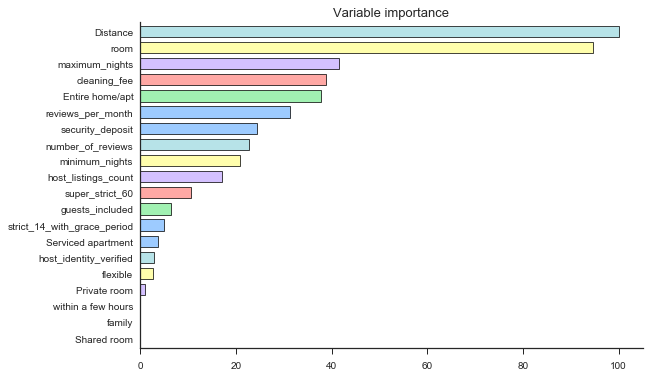

In [155]:
from statlearning import plot_feature_importance

plot_feature_importance(gb.best_estimator_, Predictors)
plt.show()

In [156]:
y_pred_gb= gb.predict(x_test)

In [157]:
submission = pd.DataFrame(np.c_[x_train.index, np.exp(y_pred_gb)-1], columns=['Id', Response])
submission['Id'] = submission['Id'].astype(int)
submission.to_csv('kaggle_submission_gb.csv',  index=False)

In [158]:
import xgboost as xgb

# XGBoost

In [ ]:
model_4 = xgb.XGBRegressor()

tuning_parameters = {
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'n_estimators' : [100, 150, 200, 300, 400, 500, 600],
    'max_depth' : [2 ,3, 4, 5, 6],
    'subsample' : [0.5, 0.6, 0.8, 0.9, 1.0]
}

xbst_search = RandomizedSearchCV(model_4, tuning_parameters, n_iter = 25, cv = 10, return_train_score=False, n_jobs=4,
                              random_state = 20)
xbst_search.fit(x_train, y_train)

xbst = xbst_search.best_estimator_


print('Best parameters found by randomised search:', xbst_search.best_params_, '\n')

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/x

In [ ]:
from statlearning import plot_feature_importance

plot_feature_importance(xbst, labels=Predictors)
plt.show()

In [ ]:
%%time

dtrain = xgb.DMatrix(x_train, y_train) # we need to convert the data to the format required by xgboost
dtest  = xgb.DMatrix(x_test)

param = {
    'max_depth': 2, 
    'learning_rate': 0.1, 
    'subsample': 0.8,
    'silent' : 0, 
    'objective':'reg:linear',  
     }

cv = xgb.cv(param, dtrain, num_boost_round = 1500, nfold=10, early_stopping_rounds=50)

print(f'Selected number of boosting iterations: {cv.shape[0]}')
print(f'RMSE (CV): {cv.iloc[-1,0]:.4f}')

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(cv.iloc[:,0])
ax.set_ylabel('Cross-validation RMSE')
ax.set_xlabel('Boosting iterations')
sns.despine()
plt.show()

# Additive Boosting

In [ ]:
%%time

y_fit = lasso.predict(x_train)
resid = y_train - y_fit

model_5 = xgb.XGBRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2, 3, 4],
    'subsample' : [0.6, 0.8, 1.0],
}

gb_search = RandomizedSearchCV(model_5, tuning_parameters, n_iter = 16, cv = 5, return_train_score=False, n_jobs=4,
                              random_state = 20)
gb_search.fit(x_train, resid)

abst = gb_search.best_estimator_


print('Best parameters found by randomised search:', gb_search.best_params_, '\n')